In [1]:
#import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
# K Fold Cross Validation
from sklearn.model_selection import KFold,cross_val_score,cross_validate
# Stratified K Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
# Leave One Out Cross Validator
from sklearn.model_selection import LeaveOneOut

In [2]:
df = pd.read_csv('data.csv') # import data set

In [3]:
df

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6607,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,2,25.30,2153,1
1,2598,0,0,0,0,7,1,0,1,0,...,2,0,0,0,0,1,2,75.15,4396,0
2,2345,0,0,0,1,4,1,0,2,1,...,1,1,1,1,0,1,0,20.05,6211,0
3,4093,0,0,0,0,29,1,2,1,0,...,0,0,0,0,0,1,1,76.00,1850,0
4,693,0,0,0,0,3,1,2,1,0,...,0,0,0,0,0,1,1,75.10,2350,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3772,1,0,1,0,1,1,0,1,2,...,0,0,2,2,0,1,2,95.00,6440,1
5278,5191,0,0,1,1,23,1,2,0,2,...,2,2,2,2,2,1,1,91.10,1819,0
5279,5226,1,0,1,1,12,1,0,2,1,...,1,1,1,1,0,1,2,21.15,2659,0
5280,5390,1,1,0,0,12,1,2,1,0,...,2,0,2,2,0,1,2,99.45,370,1


In [4]:
df.shape

(5282, 21)

In [5]:
df.Churn.value_counts()

0    3892
1    1390
Name: Churn, dtype: int64

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2,25.30,2153,1
1,0,0,0,0,7,1,0,1,0,0,2,0,0,0,0,1,2,75.15,4396,0
2,0,0,0,1,4,1,0,2,1,1,1,1,1,1,0,1,0,20.05,6211,0
3,0,0,0,0,29,1,2,1,0,0,0,0,0,0,0,1,1,76.00,1850,0
4,0,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,1,75.10,2350,1


In [8]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
x=df.drop('Churn',axis=1)

In [10]:
y=df['Churn']

In [11]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2,25.30,2153
1,0,0,0,0,7,1,0,1,0,0,2,0,0,0,0,1,2,75.15,4396
2,0,0,0,1,4,1,0,2,1,1,1,1,1,1,0,1,0,20.05,6211
3,0,0,0,0,29,1,2,1,0,0,0,0,0,0,0,1,1,76.00,1850
4,0,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,1,75.10,2350


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=42)

# Task:1

In [14]:
#task:1 Analysis the dataset using seaborn / matplotlib / scatter

<AxesSubplot:xlabel='gender', ylabel='count'>

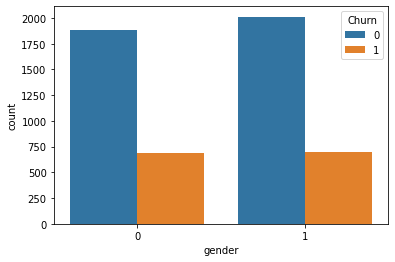

In [15]:
sns.countplot(x='gender',hue='Churn',data=df)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

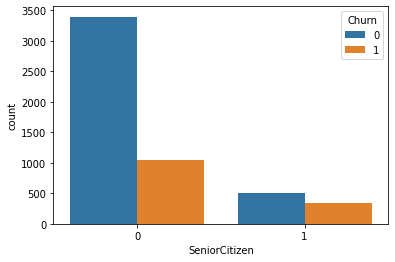

In [16]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

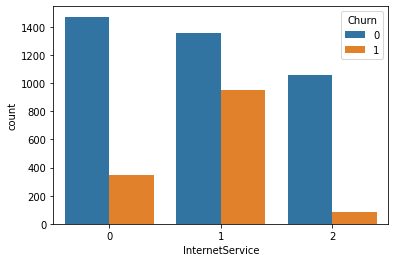

In [17]:
sns.countplot(x='InternetService',hue='Churn',data=df)

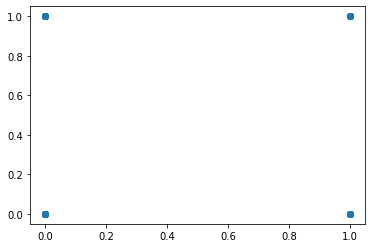

In [18]:
plt.scatter(df['gender'],df['Churn'])

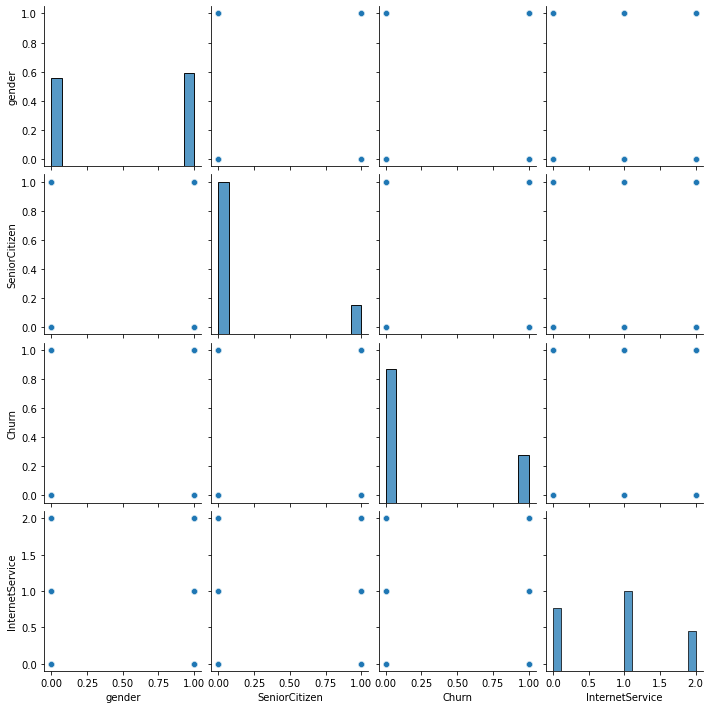

In [19]:
sns.pairplot(df[['gender','SeniorCitizen','Churn','InternetService']])

# Task: 2

In [20]:
#task:2 Do SMOTETomek sampling on given dataset and Create ML model and evaluate model by cross validation again

In [21]:
from imblearn.combine import SMOTETomek

In [22]:
sm=SMOTETomek(random_state=42)

In [23]:
XSmote,YSomote=sm.fit_resample(x,y)

In [24]:
XSmote.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2,25.3,2153
1,0,0,0,0,29,1,2,1,0,0,0,0,0,0,0,1,1,76.0,1850
2,0,0,0,0,3,1,2,1,0,0,0,0,0,0,0,1,1,75.1,2350
3,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,3,25.8,2158
4,1,0,0,0,7,0,1,0,2,0,2,0,0,0,1,0,3,35.3,2287


### Hold Out Cross Validation

In [25]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(XSmote,YSomote,test_size=.25,random_state=42)

In [26]:
xtrain1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6687,0,0,1,0,9,1,0,1,0,0,0,0,1,2,0,0,2,87.683647,6218
5722,0,0,1,0,3,1,0,0,0,0,0,1,0,1,0,0,1,63.492352,1928
102,1,0,0,0,19,1,0,1,0,0,0,2,0,2,1,1,1,87.700000,1232
2470,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,1,3,74.600000,5722
4386,1,0,1,0,6,1,2,1,0,0,0,0,2,0,0,1,2,82.850000,3910


## Decesion Tree Classifier 

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
clf=DecisionTreeClassifier()

In [29]:
# with Sampling
clf.fit(xtrain1,ytrain1) 
print("With Sampling Result is {}".format(clf.score(xtest1,ytest1)))
# without Sampling
clf.fit(xtrain,ytrain) 
print("Without Sampling Result is {}".format(clf.score(xtest,ytest)))

With Sampling Result is 0.815041782729805
Without Sampling Result is 0.7335352006056018


In [30]:
# K Fold  Cross Validation
kfold=KFold(n_splits=4)
result=cross_val_score(clf,XSmote,YSomote,cv=kfold)
result.max()

0.8450390189520625

In [31]:
# Stratified K Fold Cross Validation
st=StratifiedKFold(n_splits=4)
result=cross_val_score(clf,XSmote,YSomote,cv=st)
result.max()

0.8584169453734671

In [32]:
# Leave One Out Cross Validation
le=LeaveOneOut()
result=cross_val_score(clf,XSmote,YSomote,cv=le)
result.max()

1.0

## XGBoost Classifier

In [33]:
from xgboost import XGBClassifier

In [34]:
xgb=XGBClassifier()

In [35]:
# with Sampling
xgb.fit(xtrain1,ytrain1) 
print("With Sampling Result is {}".format(clf.score(xtest1,ytest1)))
# without Sampling
xgb.fit(xtrain,ytrain) 
print("Without Sampling Result is {}".format(clf.score(xtest,ytest)))

With Sampling Result is 0.8295264623955432
Without Sampling Result is 0.7335352006056018


## Ada Boost 

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
ada=AdaBoostClassifier()

In [38]:
# with Sampling
ada.fit(xtrain1,ytrain1) 
print("With Sampling Result is {}".format(clf.score(xtest1,ytest1)))
# without Sampling
ada.fit(xtrain,ytrain) 
print("Without Sampling Result is {}".format(clf.score(xtest,ytest)))

With Sampling Result is 0.8295264623955432
Without Sampling Result is 0.7335352006056018


## KNN Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

In [40]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [41]:
n_neighbors=np.random.randint(1,15,25)
weights=['uniform','distance']
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']

grids={
    'n_neighbors':n_neighbors,
    'weights':weights,
    'algorithm':algorithm
}

In [42]:
rando2=RandomizedSearchCV(estimator=neigh,param_distributions=grids,n_iter=200)

In [43]:
# With Sampling
rando2.fit(xtrain1,ytrain1)

RandomizedSearchCV(estimator=KNeighborsClassifier(n_neighbors=3), n_iter=200,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': array([ 2,  6,  5,  7,  4, 13, 10,  9,  8,  8, 14, 10, 10,  7, 10,  5, 10,
       13,  1,  2, 10,  9,  9, 10,  2]),
                                        'weights': ['uniform', 'distance']})

In [44]:
rando2.best_params_

{'weights': 'uniform', 'n_neighbors': 1, 'algorithm': 'ball_tree'}

In [45]:
rando2.best_score_

0.8253764932881852

In [46]:
score1=rando2.score(xtest1,ytest1)

In [47]:
# WithOut Sampling
rando2.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=KNeighborsClassifier(n_neighbors=3), n_iter=200,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': array([ 2,  6,  5,  7,  4, 13, 10,  9,  8,  8, 14, 10, 10,  7, 10,  5, 10,
       13,  1,  2, 10,  9,  9, 10,  2]),
                                        'weights': ['uniform', 'distance']})

In [48]:
rando2.best_params_

{'weights': 'uniform', 'n_neighbors': 14, 'algorithm': 'auto'}

In [49]:
rando2.best_score_

0.75814067535379

In [50]:
score2=rando2.score(xtest,ytest)

In [51]:
# with Sampling
print("With Sampling Result is {}".format(score1))
# without Sampling
print("Without Sampling Result is {}".format(score2))

With Sampling Result is 0.8356545961002786
Without Sampling Result is 0.7585162755488266


## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
ran1=RandomForestClassifier(n_estimators=100)

In [54]:
total_trees=np.random.randint(15,200,25)
criterion=["gini", "entropy"]
min_samples_split=np.random.randint(1,3,10)
min_samples_leaf=[1,2]
max_features=['sqrt','log2']

grids={
    'n_estimators':total_trees,
    'criterion':criterion,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features
}

In [57]:
rando=RandomizedSearchCV(estimator=ran1,param_distributions=grids,n_iter=200)

In [58]:
# With Sampling
rando.fit(xtrain1,ytrain1)

C:\Users\Youtech BD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
465 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
465 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Youtech BD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Youtech BD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\Youtech BD\AppData\Local\Programs\Python\Python310\lib\site-pack

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=200,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': array([1, 1, 1, 2, 2, 2, 2, 2, 2, 1]),
                                        'n_estimators': array([117,  23,  46, 114, 148,  57, 139, 191, 171, 111, 163,  32, 197,
       137, 139, 165, 151, 139,  85,  26,  57,  64,  44, 171, 185])})

In [59]:
score1=rando.score(xtest1,ytest1)

In [60]:
rando.best_estimator_

RandomForestClassifier(n_estimators=46)

In [61]:
# WithOut Sampling
rando.fit(xtrain,ytrain)
score2=rando.score(xtest1,ytest1)

C:\Users\Youtech BD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
455 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
455 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Youtech BD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Youtech BD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\Youtech BD\AppData\Local\Programs\Python\Python310\lib\site-pack

In [62]:
# with Sampling
print("With Sampling Result is {}".format(score1))
# without Sampling
print("Without Sampling Result is {}".format(score2))

With Sampling Result is 0.8506963788300835
Without Sampling Result is 0.792200557103064


# Task: 3

In [63]:
#task:3 Do Undersampling on given dataset and Create ML model and evaluate model by cross validation again

In [64]:
from imblearn.under_sampling import NearMiss

In [65]:
nearMissObj=NearMiss()

In [66]:
XUnderSampling,yUnderSampling=nearMissObj.fit_resample(x,y)

In [67]:
yUnderSampling.value_counts()

0    1390
1    1390
Name: Churn, dtype: int64

In [68]:
# Hold Out Cross Validation
xtrain1,xtest1,ytrain1,ytest1=train_test_split(XUnderSampling,yUnderSampling,test_size=.25,random_state=42)

# Decesion Tree Classifier

In [69]:
# with Sampling
clf.fit(xtrain1,ytrain1) 
print("With Sampling Result is {}".format(clf.score(xtest1,ytest1)))
# without Sampling
clf.fit(xtrain,ytrain) 
print("Without Sampling Result is {}".format(clf.score(xtest,ytest)))

With Sampling Result is 0.6143884892086331
Without Sampling Result is 0.7335352006056018


In [70]:
# K Fold  Cross Validation
kfold=KFold(n_splits=4)
result=cross_val_score(clf,XUnderSampling,yUnderSampling,cv=kfold)
result.max()

0.4719424460431655

In [71]:
# Stratified K Fold Cross Validation
st=StratifiedKFold(n_splits=4)
result=cross_val_score(clf,XUnderSampling,yUnderSampling,cv=st)
result.max()

0.5884892086330935

In [72]:
# Leave One Out Cross Validation
le=LeaveOneOut()
result=cross_val_score(clf,XUnderSampling,yUnderSampling,cv=le)
result.max()

1.0

# Task: 4

In [73]:
#task:4 Do Over sampling on given dataset and Create ML model and evaluate model by cross validation again

In [74]:
from imblearn.over_sampling import RandomOverSampler

In [75]:
overSamplingObj=RandomOverSampler(random_state=100)

In [76]:
XOverSampling,yOverSampling=overSamplingObj.fit_resample(x,y)

In [77]:
# Hold Out Cross Validation
xtrain1,xtest1,ytrain1,ytest1=train_test_split(XOverSampling,yOverSampling,test_size=.25,random_state=42)

# Decesion Tree Classifier

In [78]:
# with Sampling
clf.fit(xtrain1,ytrain1) 
print("With Sampling Result is {}".format(clf.score(xtest1,ytest1)))
# without Sampling
clf.fit(xtrain,ytrain) 
print("Without Sampling Result is {}".format(clf.score(xtest,ytest)))

With Sampling Result is 0.8530318602261048
Without Sampling Result is 0.7229371688115064


In [79]:
# K Fold  Cross Validation
kfold=KFold(n_splits=4)
result=cross_val_score(clf,XOverSampling,yOverSampling,cv=kfold)
result.max()

0.9953751284686536

In [80]:
# Stratified K Fold Cross Validation
st=StratifiedKFold(n_splits=4)
result=cross_val_score(clf,XOverSampling,yOverSampling,cv=st)
result.max()

0.9003083247687564

In [81]:
# Leave One Out Cross Validation
le=LeaveOneOut()
result=cross_val_score(clf,XOverSampling,yOverSampling,cv=le)
result.max()

1.0

# Task: 5

In [82]:
#task:5 Evaluate all results

In [83]:
"""
Here Task 02 I Wil Try Many Classification for understand result using SMOTTomek

then compare Decesion Tree Classifier Then get 
With Sampling Result is 0.815041782729805
Without Sampling Result is 0.7335352006056018
when use K Fold Cross Validator then gotted Max Score is: 0.8450390189520625
when use Stratified K FOld Cross Validator then gotted Max Score is : 0.8584169453734671
when use Leave One Out Cross Validator then gotted Max Score is : 1.0

"""

'\nHere Task 02 I Wil Try Many Classification for understand result using SMOTTomek\n\nthen compare Decesion Tree Classifier Then get \nWith Sampling Result is 0.8083565459610028\nWithout Sampling Result is 0.7312641937925813\nwhen use K Fold Cross Validator then gotted Max Score is: 0.8450390189520625\nwhen use Stratified K FOld Cross Validator then gotted Max Score is : 0.8567447045707915\nwhen use Leave One Out Cross Validator then gotted Max Score is : 1.0\n\n'

In [84]:
"""
Here Task 03 I Wil Try Decesion Tree Classification for understand result using UnderSampling

then compare Decesion Tree Classifier Then get 
With Sampling Result is 0.6143884892086331
Without Sampling Result is 0.7335352006056018
when use K Fold Cross Validator then gotted Max Score is: 0.4719424460431655
when use Stratified K FOld Cross Validator then gotted Max Score is : 0.5884892086330935
when use Leave One Out Cross Validator then gotted Max Score is : 1.0

"""

'\nHere Task 03 I Wil Try Decesion Tree Classification for understand result using UnderSampling\n\nthen compare Decesion Tree Classifier Then get \nWith Sampling Result is 0.8128133704735376\nWithout Sampling Result is 0.7342922028766087\nwhen use K Fold Cross Validator then gotted Max Score is: 0.48633093525179855\nwhen use Stratified K FOld Cross Validator then gotted Max Score is : 0.5942446043165468\nwhen use Leave One Out Cross Validator then gotted Max Score is : 1.0\n\n'

In [85]:
"""
Here Task 04 I Wil Try Decesion Tree Classification for understand result using UnderSampling

then compare Decesion Tree Classifier Then get 
With Sampling Result is 0.8530318602261048
Without Sampling Result is 0.7229371688115064
when use K Fold Cross Validator then gotted Max Score is: 0.9953751284686536
when use Stratified K FOld Cross Validator then gotted Max Score is : 0.9003083247687564
when use Leave One Out Cross Validator then gotted Max Score is : 1.0

"""

'\nHere Task 04 I Wil Try Decesion Tree Classification for understand result using UnderSampling\n\nthen compare Decesion Tree Classifier Then get \nWith Sampling Result is 0.8530318602261048\nWithout Sampling Result is 0.7274791824375473\nwhen use K Fold Cross Validator then gotted Max Score is: 0.9953751284686536\nwhen use Stratified K FOld Cross Validator then gotted Max Score is : 0.9044193216855088\nwhen use Leave One Out Cross Validator then gotted Max Score is : 1.0\n\n'

# So Task 2,3 and 4 we can tell OverSampling is Better then Undersampling and Synthetic Minority 

# Thanks for watching 